# ***Part 1 - Bagging Ensemble***

In [16]:
#import dataset from sklearn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()
#List everything inside iris dataset
print(dir(iris))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [17]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [18]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [19]:
#convert dataset into pandas data frame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
#add target into our df dataset
df['target'] = iris.target
df.tail(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


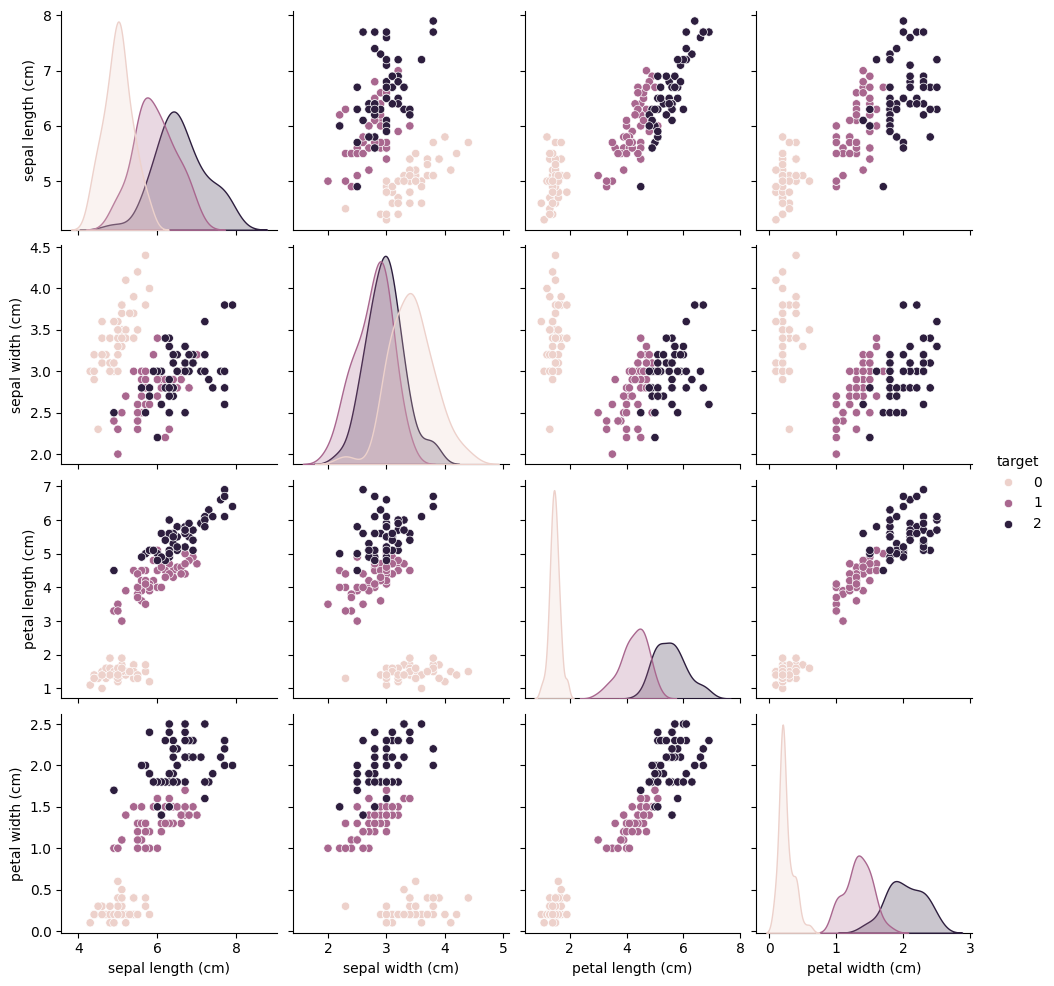

In [24]:
#To examine feature relationships --> Show the distribution of each feature with colors for each target class
sns.pairplot(df, hue='target') #hue -> Colors points by class/category
plt.show()

In [25]:
#take sepal width and petal length along with target and remove all values of setosa reperesenting 0 in the target from all columns
df = df[df['target']!=0][['sepal width (cm)','petal length (cm)','target']] # only contain versicolor and verginica
df

,sepal width (cm),petal length (cm),target
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1
...,...,...,...
145,3.0,5.2,2
146,2.5,5.0,2
147,3.0,5.2,2
148,3.4,5.4,2


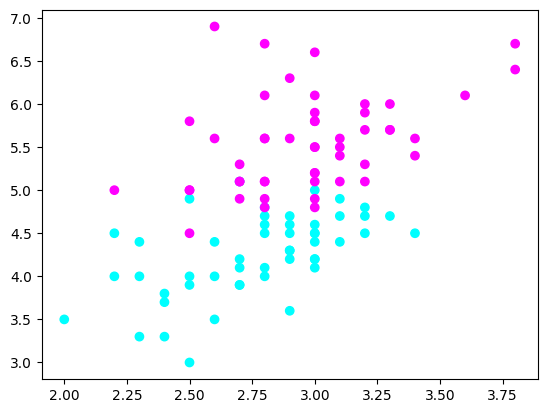

In [34]:
#Draw a scatter plot (X–Y dot plot)
#X-axis(sepal width), Y-axis(petal length), Each point's color(target=versicolor,verginica), Color style(cmap='any')
plt.scatter(df['sepal width (cm)'], df['petal length (cm)'], c=df['target'], cmap='cool')

In [35]:
#NO shuffling here compare it with sampling
df

,sepal width (cm),petal length (cm),target
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1
...,...,...,...
145,3.0,5.2,2
146,2.5,5.0,2
147,3.0,5.2,2
148,3.4,5.4,2


In [38]:
#100 rows(samples) After shuffling everytime, first 60 belongs to train then 60-80 belongs to validation then 80-100 test
df = df.sample(100)
# 10 rows(samples) randomly from train(0-60), 5 for each of validation(60-80) and 5 for test(80-120)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [39]:
df

,sepal width (cm),petal length (cm),target
116,3.0,5.5,2
52,3.1,4.9,1
101,2.7,5.1,2
70,3.2,4.8,1
126,2.8,4.8,2
...,...,...,...
50,3.2,4.7,1
128,2.8,5.6,2
106,2.5,4.5,2
67,2.7,4.1,1


In [40]:
df_train

,sepal width (cm),petal length (cm),target
131,3.8,6.4,2
92,2.6,4.0,1
86,3.1,4.7,1
135,3.0,6.1,2
51,3.2,4.5,1
130,2.8,6.1,2
109,3.6,6.1,2
73,2.8,4.7,1
74,2.9,4.3,1
98,2.5,3.0,1


In [41]:
df_val

,sepal width (cm),petal length (cm),target
87,2.3,4.4,1
141,3.1,5.1,2
124,3.3,5.7,2
69,2.5,3.9,1
58,2.9,4.6,1


In [42]:
#from Validation data which are random rows
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

print("X_test:\n", X_test)
print("\ny_test:\n", y_test)

X_test:
 [[2.3 4.4]
 [3.1 5.1]
 [3.3 5.7]
 [2.5 3.9]
 [2.9 4.6]]

y_test:
 [1 2 2 1 1]


# **Case-1 Bagging**

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree   #plot/visualize the decision tree structure
#plot_decision_regions() only works when X has exactly 2 columns
from mlxtend.plotting import plot_decision_regions #visualize decision boundaries of classifiers
from sklearn.metrics import accuracy_score

In [45]:
#function which has clf->classifier(model), X->data, y->target
def evaluate(clf, X, y):
  clf.fit(X,y)
  plot_tree(clf)
  plt.show()
  plot_decision_regions(X, y, clf=clf, legend=2)
  y_pred = clf.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  print("Accuracy:", acc)

Bootstrapping (training part)

In [47]:
#Data for Tree 1
df_bag1 = df_train.sample(8,replace=True) #from 10 rows(samples) any 8 samples wil come out as with replacement
X1 = df_bag1.iloc[:,0:2].values
y1 = df_bag1.iloc[:,-1].values

print("X:\n",X1)
print("y:\n",y1)

X:
 [[3.8 6.4]
 [3.  6.1]
 [2.5 3. ]
 [3.  6.1]
 [2.8 6.1]
 [3.8 6.4]
 [3.1 4.7]
 [3.1 4.7]]
y:
 [2 2 1 2 2 2 1 1]


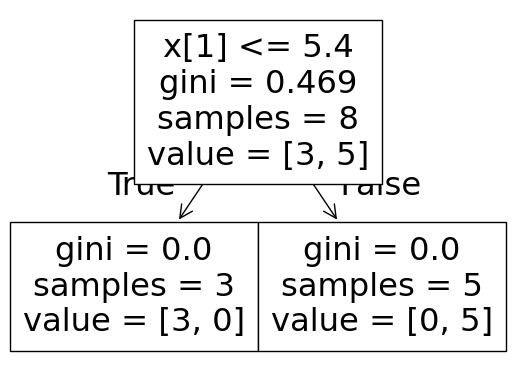

Accuracy: 0.8


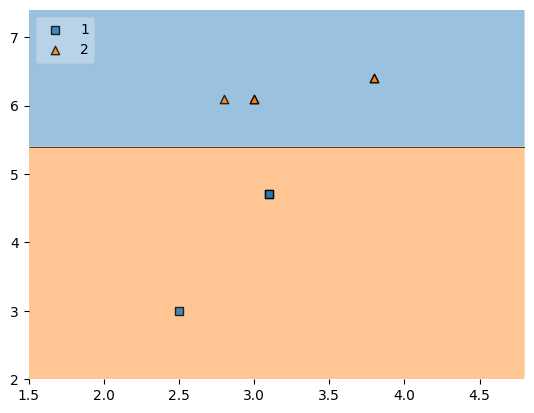

In [48]:
#model 1 evaluation
dt_bag1 = DecisionTreeClassifier()
evaluate(dt_bag1, X1, y1)

In [49]:
#Data for Tree 2
df_bag2 = df_train.sample(8, replace=True)
X2 = df_bag2.iloc[:,0:2].values
y2 = df_bag2.iloc[:,-1].values
print("X:\n",X2)
print("y:\n",y2)

X:
 [[3.  6.1]
 [3.8 6.4]
 [3.2 4.5]
 [3.8 6.4]
 [2.9 4.3]
 [2.9 4.3]
 [3.8 6.4]
 [3.6 6.1]]
y:
 [2 2 1 2 1 1 2 2]


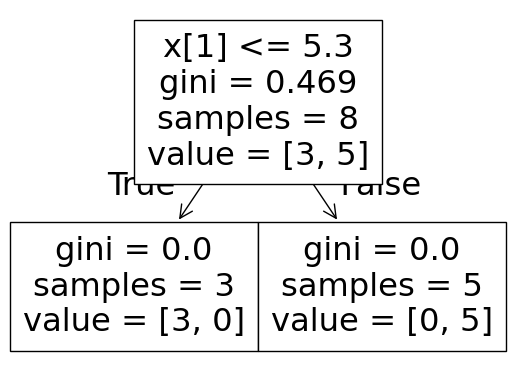

Accuracy: 0.8


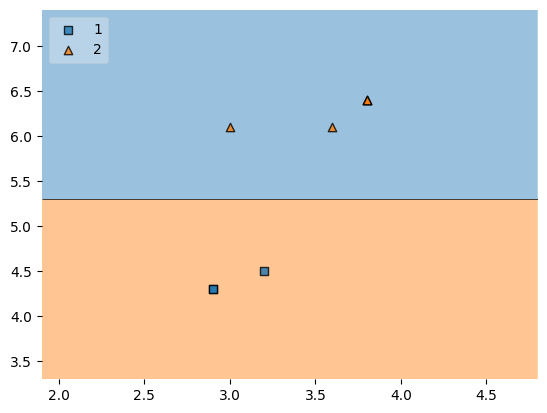

In [51]:
#model 2 evaluation
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2, X2, y2)

In [52]:
#Data for Tree 3
df_bag3 = df_train.sample(8, replace=True)
X3 = df_bag3.iloc[:,0:2].values
y3 = df_bag3.iloc[:,-1].values
print("X:\n",X3)
print("y:\n",y3)

X:
 [[2.9 4.3]
 [3.6 6.1]
 [3.8 6.4]
 [2.8 6.1]
 [2.8 4.7]
 [2.9 4.3]
 [2.9 4.3]
 [2.8 4.7]]
y:
 [1 2 2 2 1 1 1 1]


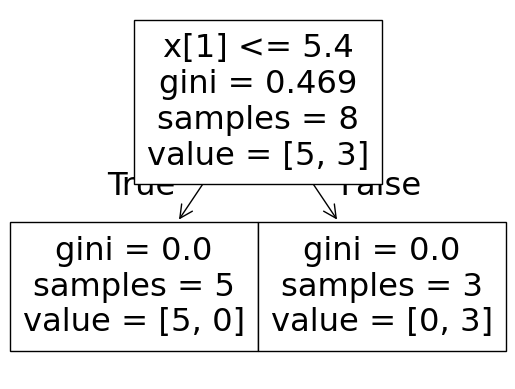

Accuracy: 0.8


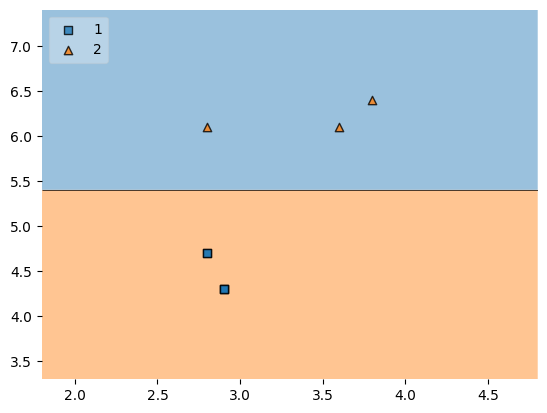

In [53]:
#model 3 evaluation
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3, X3, y3)

Aggregation (prediction part)

In [54]:
df_test

,sepal width (cm),petal length (cm),target
99,2.8,4.1,1
110,3.2,5.1,2
123,2.7,4.9,2
140,3.1,5.6,2
105,3.0,6.6,2


In [62]:
#Predict values based on df_test using sepal width and petal length
print("Predictor 1", dt_bag1.predict(np.array([2.7,4.9]).reshape(1,2)))
print("Predictor 2", dt_bag2.predict(np.array([2.7,4.9]).reshape(1,2)))
print("Predictor 3", dt_bag2.predict(np.array([2.7,4.9]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [1]
Predictor 3 [1]


**Types of Bagging**

**(1) Pasting -> In this we do  Row Sampling without replacement**

In [63]:
df_train

,sepal width (cm),petal length (cm),target
131,3.8,6.4,2
92,2.6,4.0,1
86,3.1,4.7,1
135,3.0,6.1,2
51,3.2,4.5,1
130,2.8,6.1,2
109,3.6,6.1,2
73,2.8,4.7,1
74,2.9,4.3,1
98,2.5,3.0,1


In [64]:
#row sampling without replacement, by default false
df_train.sample(8)

,sepal width (cm),petal length (cm),target
92,2.6,4.0,1
135,3.0,6.1,2
98,2.5,3.0,1
74,2.9,4.3,1
86,3.1,4.7,1
73,2.8,4.7,1
51,3.2,4.5,1
109,3.6,6.1,2


**(2)Random Subspaces -> in this we do Column Sampling (with replacement or without replacement)**

In [65]:
df1 = pd.DataFrame(iris.data,columns=iris.feature_names)
df1['target']=iris.target
# df1 = df1[df1['target']!=0] #remove setosa(0) values
df1 = df1.sample(10) #take 10 random rows from df1
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
48,5.3,3.7,1.5,0.2,0
35,5.0,3.2,1.2,0.2,0
93,5.0,2.3,3.3,1.0,1
100,6.3,3.3,6.0,2.5,2
136,6.3,3.4,5.6,2.4,2
138,6.0,3.0,4.8,1.8,2
29,4.7,3.2,1.6,0.2,0
45,4.8,3.0,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
141,6.9,3.1,5.1,2.3,2


In [72]:
#axis=1 means column sampling
df1.sample(2, replace=True, axis=1)

,petal length (cm),petal width (cm)
48,1.5,0.2
35,1.2,0.2
93,3.3,1.0
100,6.0,2.5
136,5.6,2.4
138,4.8,1.8
29,1.6,0.2
45,1.4,0.3
7,1.5,0.2
141,5.1,2.3


**(3)Random Patches -> In this we do both Row Sampling and Column Sampling**

In [73]:
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
48,5.3,3.7,1.5,0.2,0
35,5.0,3.2,1.2,0.2,0
93,5.0,2.3,3.3,1.0,1
100,6.3,3.3,6.0,2.5,2
136,6.3,3.4,5.6,2.4,2
138,6.0,3.0,4.8,1.8,2
29,4.7,3.2,1.6,0.2,0
45,4.8,3.0,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
141,6.9,3.1,5.1,2.3,2


In [76]:
# every time we get 8 rows and 2 columns
df1.sample(8, replace=True).sample(2,replace=True, axis=1)

,sepal length (cm),sepal length (cm)
93,5.0,5.0
136,6.3,6.3
48,5.3,5.3
45,4.8,4.8
136,6.3,6.3
7,5.0,5.0
136,6.3,6.3
141,6.9,6.9
